* 사이킷런(scikit-learn)은 파이썬 머신러닝 라이브러리 중 가장 많이 사용된다.

* 파이썬 기반의 머신러닝을 위한 가장 쉽고 효율적인 개발 라이브러리를 제공한다.

* Anaconda가 제공하는 사이킷런 버전은 0.24.2이며 가장 최신 버전은 1.0.2 => 아나콘다 프롬프트 열고 pip install scikit-learn==1.0.2

In [2]:
import sklearn
print(sklearn.__version__)  # 왜 1.4.1인지 모름..

1.4.1.post1


* 첫 번째 머신러닝 - 붓꽃 품종 예측

In [3]:
from sklearn.datasets import load_iris  # 사이킷런에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈의 모임
from sklearn.tree import DecisionTreeClassifier  # 트리 기반 ML 알고리즘을 구현한 클래스 모임
from sklearn.model_selection import train_test_split  # 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼파라미터 평가하기 위한 다양한 모듈의 모임

In [9]:
import pandas as pd

# 붓꽃 데이터 세트 로딩
iris = load_iris()

# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있다.
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있다.
iris_label = iris.target
print(f"iris target값 : {iris_label}")
print(f"iris target명: {iris.target_names}")

# 붓꽃 데이터 세트 자세히 보기 위해 DataFrame으로 변환
iris_df = pd.DataFrame(data=iris_data, columns = iris.feature_names)
iris_df['label']=iris.target
iris_df

iris target값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
keys = iris.keys()
print(f"붓꽃 데이터 세트의 키들 : {keys}")

붓꽃 데이터 세트의 키들 : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [17]:
print('\n feature_names의 type :', type(iris.feature_names))
print('feature_names 의 shape:', len(iris.feature_names))
print(iris.feature_names)

print('\n target_names의 type :', type(iris.target_names))
print('target_names 의 shape:', len(iris.target_names))
print(iris.target_names)

print('\n data의 type:', type(iris.data))
print('data의 shape:', iris.data.shape)
print(iris['data'])

print('\n target의 type:', type(iris.target))
print('target의 shape:', iris.target.shape)
print(iris.target)


 feature_names의 type : <class 'list'>
feature_names 의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names의 type : <class 'numpy.ndarray'>
target_names 의 shape: 3
['setosa' 'versicolor' 'virginica']

 data의 type: <class 'numpy.ndarray'>
data의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [

In [5]:
# 학습용 데이터와 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label,
                                                    test_size=0.2, random_state=11)

In [6]:
# DesicionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
dt_clf.fit(X_train, y_train)

# 학습이 완료된 DesicionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)

from sklearn.metrics import accuracy_score  # 성능 평가 방법
print(f"예측 정확도 : {accuracy_score(y_test, pred):.4f}")

예측 정확도 : 0.9333


In [7]:
# 정리 

# 1. 데이터 세트 분리 : 데이터를 학습 및 테스트 데이터 분리한다
# 2. 모델 학습 : 학습 데이터를 기반으로 ML 알고리즘 적용해 모델 학습시킨다.
# 3. 예측 수행 : 학습된 ML 모델을 이용해 테스트 데이터의 분류를 예측한다.
# 4. 평가 : 이렇게 예측된 결괏값과 테스트 데이터의 실제 결괏값을 비교해 ML 모델 성능을 평가한다.

* 사이킷런의 기반 프레임워크 익히기

In [ ]:
# Estimator 이해 및 fit(), predict() 메서드

# 사이킷런은 ML 모델 학습을 위해 fit(), 학습된 모델의 예측을 위해 predict() 메서드를 제공한다.
# 지도학습의 주요 두 축인 분류, 회귀의 다양한 알고리즘을 구현한 모든 사이킷런 클래스는 fit()과 predict()만을 이용해 간단하게 학습과 예측 결과를 반환한다.

# 분류 알고리즘을 구현한 클래스를 Classifier, 회귀 알고리즘을 구현한 클래스를 Regressor로 지칭한다.
# 이들을 합쳐서 Estimator 클래스라고 부른다.

# cross_val_score()와 같은 evaluation 함수, GridSearchCV와 같은 하이퍼파라미터 튜닝을 지원하는 클래스의 경우 이 Estimator를 인자로 받는다.
# 인자로 받은 Estimator에 대해서 cross_val_score(), GridSearchCV.fit() 함수 내에서 이 Estimator의 fit()과 predict()를 호출해서 평가를 하거나 하이퍼 파라미터 튜닝을 수행하는 것이다.

# 비지도학습인 차원 축소, 클러스터링, 피처 추출 등을 구현한 클래스 역시 대부분 fit()과 transform()을 적용한다.
# 비지도학습에서 fit()은 지도학습의 fit()과 같이 학습을 의미하는 것이 아니라 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업이다.
# fit()으로 변환을 위한 사전 구조를 맞추면 이후 입력 데이터의 차원 변환, 클러스터링, 피처 추출 등의 실제 작업은 transform()으로 수행한다.
# 이를 하나로 결합한 fit_transform()도 함께 제공하지만 주의가 필요하다.

In [18]:
# 사이킷런의 주요 모듈

# 1. 예제 데이터 : sklean.datasets : 사이킷런에 내장되어 예제로 제공하는 데이터 세트
# 2. 피처 처리 : sklearn.preprocessing : 데이터 전처리에 필요한 다양한 가공 기능 제공 (문자열을 숫자형 코드 값으로 인코딩, 정규화, 스케일링등)
#               sklearn.feature_selection : 알고리즘에 큰 영향을 미치는 피처를 우선순위대로 셀렌션작업을 수행하는 다양한 기능 제공
#               sklearn.feature_extraction : 텍스트 데이터나 이미지 데이터의 벡터화된 피처를 추출하는데 사용 된다. 예를 들어 텍스트 데이터에서 Count Vectorizer나 Tf-idf vectorizer 등을 생성하는 기능 제공. 텍스트 데이터의 피처추출은 sklearn.featrue_extraction.text 모듈에, 이미지 데이터 피처 추출은 sklearn.feature_extraction.image 모듈에 지원 API가 있다.
# 3. 피처 처리 & 차원 축소 : skelarn.decomposition : 차원 축소와 관련한 알고리즘을 지원하는 모듈. PCA, NMF, Truncated SVD 등을 통해 차원 축소 기능을 수행할 수 있다.
# 4. 데이터 분리. 검증 & 파라미터 튜닝 : sklearn.model_selection : 교차 검증을 위한 학습/테스트용 분리, 그리드서치로 최적 파라미터 추출 등의 API제공
# 5. 평가 : sklearn.metrics : 분류, 회귀, 클러스터링, 페어와이즈에 대한 다양한 성능 측정 방법 제공. Accuracy, Precision, Recall, ROC-AUC, RMSE 등 제공
# 6. ML 알고리즘 : sklearn.ensemble : 앙상블 알고리즘 제공. 랜포, 에이다, 그래디언트 등 제공
#                 sklearn.linear_model : 주로 선형 회귀, 릿지, 라쏘 및 로지스틱 회귀 등 회귀 관련 알고리즘 지원, 또한 SGD 관련 알고리즘도 제공
#                 sklearn.naive_bayes : 나이브 베이즈 알고리즘 제공. 가우시안 NB, 다항 분포 NB 등
#                 sklearn.neighbors : 최근접 이웃 알고리즘 제공. K-NN등
#                 sklearn.svm : 서포트 벡터 머신 알고리즘 제공
#                 sklearn.tree : 의사 결정 트리 알고리즘 제공
#                 sklearn.cluster : 비지도 클러스터링 알고리즘 제공 (K-means, 계층형, DBSCAN 등)
# 7. 유틸리티 : sklearn.pipeline : 피처 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 함께 묶어서 실행할 수 있는 유틸리티 제공 

In [20]:
# 내장된 예제 데이터 세트

# 1. datasets.load_boston()  # 회귀 용도, 미국 보스턴의 집 피쳐들과 가격에 대한 데이터 세트
# 2. datasets.load_breast_cancer()  # 분류 용도, 위스콘신 유방암 피처들과 악성/음성 레이블 데이터 세트
# 3. datasets.load_diabetes()  # 회귀 용도, 당뇨 데이터 세트
# 4. datasets.load_digits()  # 분류 용도, 0에서 9까지 숫자의 이미지 픽셀 데이터 세트
# 5. datasets.load_iris()  # 분류 용도, 붓꽃에 대한 피처를 가진 데이터 세트


# 분류와 클러스터링을 위한 표본 데이터 생성기

# 1. datasets.make_classifications()  # 분류를 위한 데이터 세트를 만든다. 특히 높은 상관도, 불필요한 속성 등의 노이즈 효과를 위한 데이터를 무작위로 생성해준다.
# 2. datasets.make_blobs()  # 클러스터링을 위한 데이터 세트를 무작위로 생성해준다. 군집 지정 개수에 따라 여러 가지 클러스터링을 위한 데이터 세트를 쉽게 만들어 준다.

* Model Selection 모듈 소개

In [21]:
# 1. train_test_split()

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, \
                                                    test_size=0.3, random_state=121)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print(f"예측 정확도 : {accuracy_score(y_test, pred):.4f}")

예측 정확도 : 0.9556


In [23]:
# 2. 교차 검증
# 데이터 편중을 막기 위해서 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것이다.

# K 폴드 교차 검증  # k개의 데이터 폴드 세트를 만들어서 k번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:', features.shape[0])

n_iter = 0

# KFold객체의 split()를 호출하면 폴드별 학습용, 검증용 데이터의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
    # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도: {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도 :', np.mean(cv_accuracy))

붓꽃 데이터 세트 크기: 150

#1 교차 검증 정확도: 1.0, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#1 검증 세트 인덱스 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도: 0.9667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#2 검증 세트 인덱스 [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도: 0.8667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#3 검증 세트 인덱스 [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도: 0.9333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#4 검증 세트 인덱스 [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도: 0.7333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#5 검증 세트 인덱스 [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도 : 0.9


In [27]:
# Stratified K 폴드
# 불균형한 분포도를 가진 레이블 데이터 집합을 위한 K 폴드 방식

import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

# KFold 생성
kfold = KFold(n_splits=3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증 : {0}'.format(n_iter))
    print('학습 레이블 데이터 분포 : \n', label_train.value_counts())
    print('검증 레이블 데이터 분포 : \n', label_test.value_counts())

print('교차 검증 데이터 세트를 분할하면 검증 예측 정확도는 0이 될 수 밖에 없다.')

## 교차 검증 : 1
학습 레이블 데이터 분포 : 
 label
1    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포 : 
 label
0    50
Name: count, dtype: int64
## 교차 검증 : 2
학습 레이블 데이터 분포 : 
 label
0    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포 : 
 label
1    50
Name: count, dtype: int64
## 교차 검증 : 3
학습 레이블 데이터 분포 : 
 label
0    50
1    50
Name: count, dtype: int64
검증 레이블 데이터 분포 : 
 label
2    50
Name: count, dtype: int64
교차 검증 데이터 세트를 분할하면 검증 예측 정확도는 0이 될 수 밖에 없다.


In [28]:
# StratifiedKFold로 문제 해결
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증 : {0}'.format(n_iter))
    print('학습 레이블 데이터 분포 : \n', label_train.value_counts())
    print('검증 레이블 데이터 분포 : \n', label_test.value_counts())


## 교차 검증 : 1
학습 레이블 데이터 분포 : 
 label
2    34
0    33
1    33
Name: count, dtype: int64
검증 레이블 데이터 분포 : 
 label
0    17
1    17
2    16
Name: count, dtype: int64
## 교차 검증 : 2
학습 레이블 데이터 분포 : 
 label
1    34
0    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포 : 
 label
0    17
2    17
1    16
Name: count, dtype: int64
## 교차 검증 : 3
학습 레이블 데이터 분포 : 
 label
0    34
1    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포 : 
 label
1    17
2    17
0    16
Name: count, dtype: int64


In [30]:
# StratifiedKFold 이용해 데이터 분리

skfold = StratifiedKFold(n_splits=5)
cv_accuracy = []
n_iter = 0

# StratifiedKFold의 split() 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
    # split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)

    n_iter += 1
    # 반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도: {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 교차 검증별 정확도 :', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도 :', np.mean(cv_accuracy))


#1 교차 검증 정확도: 0.9667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#1 검증 세트 인덱스 [  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]

#2 교차 검증 정확도: 0.9667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#2 검증 세트 인덱스 [ 10  11  12  13  14  15  16  17  18  19  60  61  62  63  64  65  66  67
  68  69 110 111 112 113 114 115 116 117 118 119]

#3 교차 검증 정확도: 0.9, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#3 검증 세트 인덱스 [ 20  21  22  23  24  25  26  27  28  29  70  71  72  73  74  75  76  77
  78  79 120 121 122 123 124 125 126 127 128 129]

#4 교차 검증 정확도: 0.9667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#4 검증 세트 인덱스 [ 30  31  32  33  34  35  36  37  38  39  80  81  82  83  84  85  86  87
  88  89 130 131 132 133 134 135 136 137 138 139]

#5 교차 검증 정확도: 1.0, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#5 검증 세트 인덱스 [ 40  41  42  43  44  45  46  47  48  49  90  91  92  93  94  95  96  97
  98  99 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도 : [0.9667 0.9667 0.9    0.9667 1.   

In [31]:
# 교차 검증을 간편하게 - cross_val_score()
# 위 for루프 반복으로 인덱스 추출한 뒤 반복적으로 학습과 예측 수행하고 예측 성능 반환한 일련의 과정을 한꺼번에 수행해주는 API
# cross_val_score(estimator, X, y=none, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
# cv는 교차 검증 폴드 수, scoring은 예측 성능 평가 지표를 기술

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도 :', np.round(scores, 4))
print('평균 검증 정확도 :', np.round(np.mean(scores), 4))

교차 검증별 정확도 : [0.98 0.94 0.98]
평균 검증 정확도 : 0.9667


In [32]:
# GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에

from sklearn.model_selection import GridSearchCV

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier()

### 파라미터를 딕셔너리 형태로 정렬
parameters = {'max_depth': [1, 2, 3],
              'min_samples_split': [2, 3]}

# param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정
## refit=True가 default임. True면 가장 좋은 파라미터 설정으로 재학습시킴.
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid의 하피어 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [34]:
print('GridSearchCV 최적 파라미터 :', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도 :{0:.4f}'.format(grid_dtree.best_score_))

# 그리드서치의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# 그리드서치의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없다.
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

GridSearchCV 최적 파라미터 : {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도 :0.9750
테스트 데이터 세트 정확도 : 0.9667


* 데이터 전처리

In [41]:
# 데이터 인코딩 
# 1. 레이블 인코딩 
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# LabelEncoder를 개체로 생성한 후 fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)
print('인코딩 클래스:', encoder.classes_)
print('디코딩 원본값:', encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

print('-'*50)
# 2. 원-핫 인코딩
from sklearn.preprocessing import OneHotEncoder

# 2차원 ndarray로 변환한다.
items = np.array(items).reshape(-1, 1)

# 원-핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

print('-'*50)
# 원-핫 인코딩 더 쉽게 지원하는 API - get_dummies()
df = pd.DataFrame({'items':['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

인코딩 변환값: [0 1 4 5 3 3 2 2]
인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']
--------------------------------------------------
원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)
--------------------------------------------------


,items_TV,items_냉장고,items_믹서,items_선풍기,items_전자레인지,items_컴퓨터
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,False,True
4,False,False,False,True,False,False
5,False,False,False,True,False,False
6,False,False,True,False,False,False
7,False,False,True,False,False,False


In [42]:
# 피처 스케일링과 정규화

# 피처 스케일링 : 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업으로 표준화와 정규화가 있다
# 표준화 : 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것을 의미 Xi_new = (Xi - mean(X)) / stdev(X)
# 정규화 : 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념 Xi_new = (Xi - min(X)) / (max(X) - min(X))
# 사이킷런의 Normalizer 모듈은 선형대수에서의 정규화 개념이 적용 Xi_new = Xi / (Xi^2 + yi^2 + zi^2)**(1/2)

In [46]:
# 1. StandardScaler

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(iris_data, columns = iris.feature_names)

print('feature들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

print('-'*50)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(iris_scaled, columns = iris.feature_names)
print('feature들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64
--------------------------------------------------
feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [48]:
# 2. MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(iris_scaled, columns = iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature 들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


In [53]:
# 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

# 잘못된 스케일링

# 학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array = np.arange(0, 6).reshape(-1, 1)

# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값 0, 최댓값 10으로 설정
scaler.fit(train_array)

# 1/10 scale로 trian_array 데이터 변환함. 원본 10->1로 변환됨.
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# fit()하게 되면 train_array 데이터의 최솟값 0, 최댓값 5으로 설정
scaler.fit(test_array)

# 1/5 scale로 trian_array 데이터 변환함. 원본 5->1로 변환
test_scaled = scaler.transform(test_array)

print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_scaled 데이터:', np.round(test_scaled.reshape(-1), 2))


print('\n 출력 결과를 확인하면 학습 데이터와 테스트 데이터의 스케일링이 맞지 않음을 알 수 있다.')
print('머신러닝 모델은 학습 데이터를 기반으로 학습되기 때문에 반드시 테스트 데이터는 학습 데이터의 스케일링 기준에 따라야 한다.')
print('테스트 데이터에 다시 fit()을 적용해서는 안 되며 학습 데이터로 이미 fit()적용된 Scaler 객체를 이용해 transform으로 변환해야 한다.')

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_scaled 데이터: [0.  0.2 0.4 0.6 0.8 1. ]

 출력 결과를 확인하면 학습 데이터와 테스트 데이터의 스케일링이 맞지 않음을 알 수 있다.
머신러닝 모델은 학습 데이터를 기반으로 학습되기 때문에 반드시 테스트 데이터는 학습 데이터의 스케일링 기준에 따라야 한다.
테스트 데이터에 다시 fit()을 적용해서는 안 되며 학습 데이터로 이미 fit()적용된 Scaler 객체를 이용해 transform으로 변환해야 한다.


In [55]:
# 제대로 된 스케일링

scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scaler 변환을 할 때는 반드시 fit()을 호출하지 않고 transform만으로 변환해야 함.
test_scaled = scaler.transform(test_array)
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_scaled 데이터:', np.round(test_scaled.reshape(-1), 2))


원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_scaled 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


* 사이킷런으로 수행하는 타이타닉 생존자 예측

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [57]:
titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [58]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [59]:
# 결측값 처리

titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


In [61]:
# 문자열 피처들의 값 분류 살펴보기

print(' Sex 값 분포 :\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n', titanic_df['Embarked'].value_counts())

# Cabin 의 경우 N이 687건으로 가장 많은 것도 특이하고 'C23, C25, C27'같이 여러 Cabin이 한꺼번에 표기된 값이 4건이 된다.
# 앞 문자만 추출

titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head())

 Sex 값 분포 :
 Sex
male      577
female    314
Name: count, dtype: int64

 Cabin 값 분포 :
 Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

 Embarked 값 분포 :
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64
0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object


In [63]:
# 어떤 유형의 승객이 생존 확률이 가장 높았는지 확인
# 성별에 다른 생존자 수 비교

titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

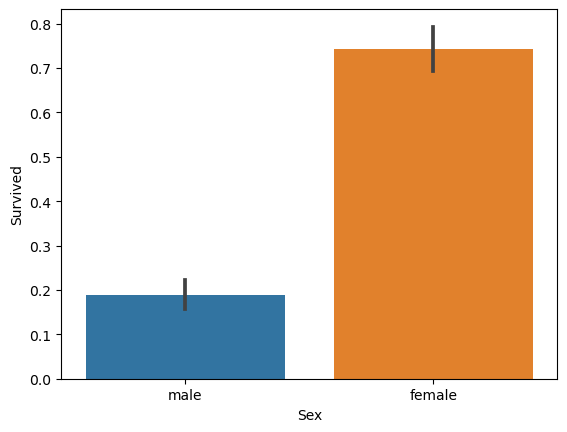

In [64]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

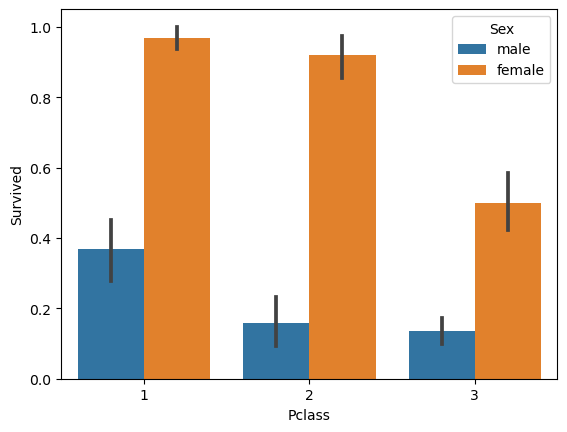

In [65]:
# 부자와 가난한 사람 간의 생존 확률
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

# 삼등실의 생존 확률이 상대적으로 많이 떨어짐

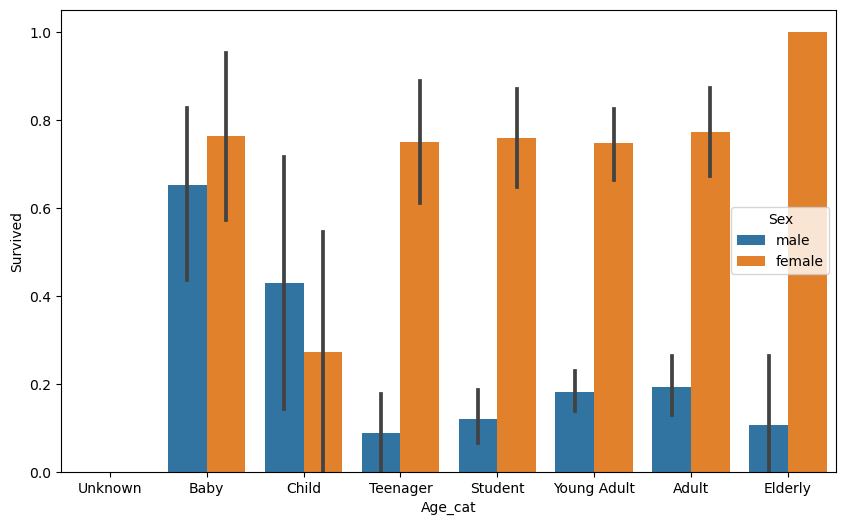

In [67]:
# 나이에 따른 생존 확률

# 입력 age에 따라 구분 값을 반환하는 함수 설정
def get_category(age):
    cat = ''
    if age<= -1: cat = 'Unknown'
    elif age<=5: cat = 'Baby'
    elif age<=12: cat = 'Child'
    elif age<=18: cat ='Teenager'
    elif age<=25: cat = 'Student'
    elif age<=35: cat='Young Adult'
    elif age<=60: cat='Adult'
    else: cat = 'Elderly'

    return cat

plt.figure(figsize=(10, 6))

# X축 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [68]:
# 전처리 - 인코딩

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le =le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])

    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [74]:
# 지금까지 피처 가공한 내역 정리하고 이를 함수로 만들어 쉽게 재사용

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le =le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [75]:
# 원본 데이터 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.2, random_state=11)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

# 결정트리 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# 랜덤포레스트 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# 로지스틱회귀 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도 : 0.8659


In [76]:
# 3개의 알고리즘 중 LogisticRegression이 타 알고리즘에 비해 높은 정확도를 나타내고 있다.
# 아직 최적화 작업을 수행하지 않고, 데이터양도 충분하지 않기 때문에 어떤 알고리즘이 가장 성능이 좋다고 평가할 수는 없다.

In [77]:
# 교차 검증으로 결정트리 모델을 좀 더 평가해보기

from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
    kfold = KFold(n_splits=folds)
    scores = []

    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))

    # 5개 fold에서 평균 정확도 계산
    mean_score = np.mean(scores)
    print("평균 정확도 : {0:.4f}".format(mean_score))
#exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8202
평균 정확도 : 0.7823


In [78]:
# 이번에는 교차 검증을 cross_val_score() API 활용

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도 {1:.4f}".format(iter_count, accuracy))

print("평균 정확도 : {0:.4f}".format(np.mean(scores)))

# StratifiedKFold를 이용해 폴드 세트 분할하기 때문에 KFold 평균 정확도와 약간 다르다.

교차 검증 0 정확도 0.7430
교차 검증 1 정확도 0.7753
교차 검증 2 정확도 0.7921
교차 검증 3 정확도 0.7865
교차 검증 4 정확도 0.8427
평균 정확도 : 0.7879


In [79]:
# 그리드서치 이용해 결정트리의 최적 하이퍼 파라미터 찾고 성능 예측하기

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
